# Cholesky Decomposition

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Multivariate normal random variables using Cholesky Decomposition

In [39]:
def cholesky_decomp(A):
    r = A.shape[0]
    c= A.shape[1]
    x = np.zeros(shape=(r,c))
    x[0,0] = A[0,0]**0.5
    for i in range(1,r):
        for j in range(i+1):
            x[i,j] = A[i,j]
            for k in range(j):
                if k!=j:
                    x[i,j] = x[i,j] - x[i,k]*x[j,k]
            if i ==j:
                x[i,j] = x[i,j]**0.5
            else:
                x[i,j] = x[i,j]/x[j,j]
    return x

##### Generate 3 normal random variables with correlation matrix given below:

In [11]:
C = np.vstack(([1,0.2,0.6],[0.2,1,0.4],[0.6,0.4,1]))
C

array([[1. , 0.2, 0.6],
       [0.2, 1. , 0.4],
       [0.6, 0.4, 1. ]])

Step 1: Generate 3 independent normal variables

In [12]:
x1 = np.random.normal()
x2 = np.random.normal()
x3 = np.random.normal()

X = np.vstack((x1,x2,x3))
X

array([[ 0.15504804],
       [-1.32950593],
       [ 0.91763348]])

Step 2: Use cholesky decomposition to transform the independent variables to dependent ones

In [13]:
Y = np.matmul(cholesky_decomp(C),X)
Y

array([[ 0.15504804],
       [-1.27163485],
       [ 0.39876225]])

###### Generate a trivariate distribution and compute the mean, variance and covariance of the variables

Since we are generating correlated variables based on standard normal variables, the mean and variance of each variable should be 0,1. The correlation between the between the variables should be given by the correlation matrix as above

In [14]:
X = [np.vstack((np.random.normal(),np.random.normal(),np.random.normal())) for i in range(1000)]

The variable X contains 1000 independent tivariate normal variables

In [24]:
M = cholesky_decomp(C)

In [25]:
Y = [np.matmul(M,X[i]) for i in range(1000)]

In [26]:
Y_extract = list(zip(*Y))

Extracting the three univariate random variables

In [27]:
y1  = [y[0] for y in Y_extract[0]]
y2  = [y[0] for y in Y_extract[1]]
y3  = [y[0] for y in Y_extract[2]]

Plotting the distribution using a KDE Plot

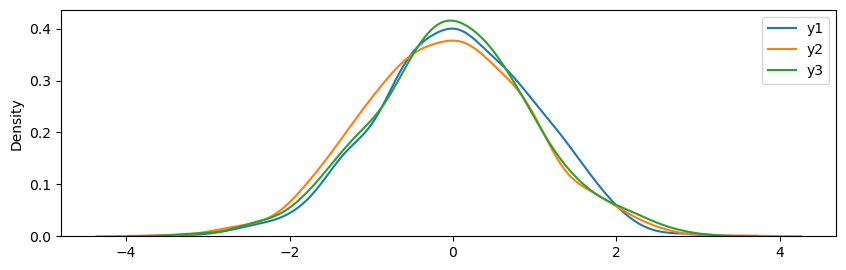

In [28]:
plt.figure(figsize=(10,3),dpi=100)
sns.kdeplot(y1,label='y1')
sns.kdeplot(y2,label='y2')
sns.kdeplot(y3,label='y3')
plt.legend()

The three distributions look approximately normal. The mean of the distributions are going to be distributed around 0 with a standrd error of $\frac{1}{\sqrt{1000}}$

In [29]:
print(f'The mean of y1 : {np.mean(y1)}')
print(f'The mean of y2 : {np.mean(y2)}')
print(f'The mean of y3 : {np.mean(y3)}')

The mean of y1 : 0.042614200245499875
The mean of y2 : -0.08712135452061992
The mean of y3 : -0.008904777243380036


In [38]:
print('The correlation matrix of the distributions:')
print(np.corrcoef(np.array([y1,y2,y3])))

The correlation matrix of the distributions:
[[1.         0.183068   0.57794279]
 [0.183068   1.         0.40454755]
 [0.57794279 0.40454755 1.        ]]


In [37]:
print('This is almost equal to the true correlation matrix given by:')
C

This is almost equal to the true correlation matrix given by:


array([[1. , 0.2, 0.6],
       [0.2, 1. , 0.4],
       [0.6, 0.4, 1. ]])